In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy
import itertools
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import matplotlib.style as style
from sklearn.datasets import make_blobs


def initiate_pandas(max_cols, cons_width):
    pd.set_option('display.max_columns', max_cols)
    pd.set_option('display.max_rows', 250)
    pd.set_option('display.width', cons_width)  # make output in console wider

df = pd.read_csv("CSV output/Leonor_csv_bearings_time_limited.csv")
print(df.shape)
df = df[df["status"] == 0]
df = df.drop(['rpm_mean', 'w_mean','w_range','w_max','status'], axis=1)
print(df.shape)
print(df.columns)


# Difference between a1 and a2 into columns.
columns_to_get_difference = (('a1_x_mean','a2_x_mean'),('a1_y_mean','a2_y_mean'),('a1_z_mean','a2_z_mean'),
                             ('a1_x_range','a2_x_range'),('a1_y_range','a2_y_range'),('a1_z_range','a2_z_range'),
                             ('a1_x_min','a2_x_min'),('a1_y_min','a2_y_min'),('a1_z_min','a2_z_min'),
                             ('a1_x_max','a2_x_max'),('a1_y_max','a2_y_max'),('a1_z_max','a2_z_max'),
                             ('a1_x_fft_mean','a2_x_fft_mean'),('a1_y_fft_mean','a2_y_fft_mean'),
                             ('a1_z_fft_mean','a2_z_fft_mean'),('a1_x_ff_range','a2_x_fft_range'),
                             ('a1_y_fft_range','a2_y_fft_range'),('a1_z_fft_range','a2_z_fft_range'),
                             ('a1_x_fft_min','a2_x_fft_min'),('a1_y_fft_min','a2_y_fft_min'),
                             ('a1_z_fft_min','a2_z_fft_min'),('a1_x_fft_max','a2_x_fft_max'),
                             ('a1_y_fft_max','a2_y_fft_max'),('a1_z_fft_max','a2_z_fft_max'))


def dataframe_with_differences_between_a1_and_a2_with_original_columns_deleted(df: pd.DataFrame, columns_to_compare_and_delete: tuple[tuple[str,str]]) -> pd.DataFrame:
    for columns in columns_to_compare_and_delete:
        a1_column = columns[0]
        a2_column = columns[1]
        difference = df[a2_column] - df[a1_column]
        df = df.drop([a1_column], axis=1)
        new_column_name = a2_column[3:] + "_difference"
        df[new_column_name] = difference
    return df

df = dataframe_with_differences_between_a1_and_a2_with_original_columns_deleted(df, columns_to_get_difference)
df = df.drop([x for x in df.columns if x.endswith("_difference")], axis=1)
print("Columns that go into Kmeans:")
print(df.columns)
print(df.shape)

std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
print(df_scaled.head())

combinations = list(itertools.combinations(df.columns, 2))
score_dict = dict()
for feature1,feature2 in combinations:
    X = df_scaled[[feature1, feature2]]
    for number_of_clusters in range(2,5):
        km = KMeans(random_state=42,n_clusters=number_of_clusters)
        km.fit(X)
        sil_score= silhouette_score(X, km.labels_)
        score_dict[sil_score] = (feature1, feature2, number_of_clusters)

(111, 54)
(99, 49)
Index(['a1_x_mean', 'a1_y_mean', 'a1_z_mean', 'a2_x_mean', 'a2_y_mean',
       'a2_z_mean', 'hz_mean', 'a1_x_range', 'a1_y_range', 'a1_z_range',
       'a2_x_range', 'a2_y_range', 'a2_z_range', 'a1_x_min', 'a1_y_min',
       'a1_z_min', 'a2_x_min', 'a2_y_min', 'a2_z_min', 'a1_x_max', 'a1_y_max',
       'a1_z_max', 'a2_x_max', 'a2_y_max', 'a2_z_max', 'a1_x_fft_mean',
       'a1_y_fft_mean', 'a1_z_fft_mean', 'a2_x_fft_mean', 'a2_y_fft_mean',
       'a2_z_fft_mean', 'a1_x_ff_range', 'a1_y_fft_range', 'a1_z_fft_range',
       'a2_x_fft_range', 'a2_y_fft_range', 'a2_z_fft_range', 'a1_x_fft_min',
       'a1_y_fft_min', 'a1_z_fft_min', 'a2_x_fft_min', 'a2_y_fft_min',
       'a2_z_fft_min', 'a1_x_fft_max', 'a1_y_fft_max', 'a1_z_fft_max',
       'a2_x_fft_max', 'a2_y_fft_max', 'a2_z_fft_max'],
      dtype='object')
Columns that go into Kmeans:
Index(['a2_x_mean', 'a2_y_mean', 'a2_z_mean', 'hz_mean', 'a2_x_range',
       'a2_y_range', 'a2_z_range', 'a2_x_min', 'a2_y_min', 'a2_

0.8137760408387911


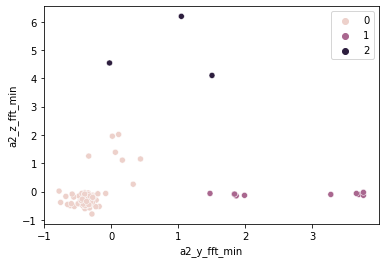

0.8025459028462989


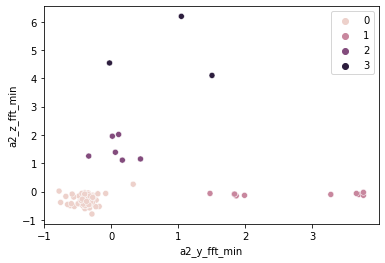

0.7362223896429395


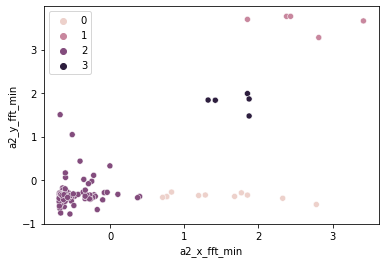

0.7339029071925466


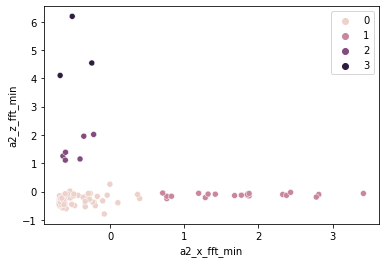

0.7258179352324623


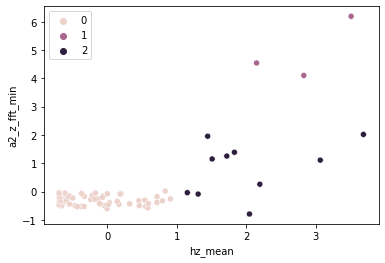

0.7212785859279915


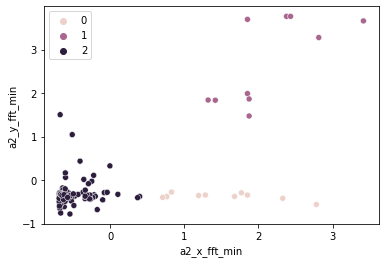

0.7206620416075283


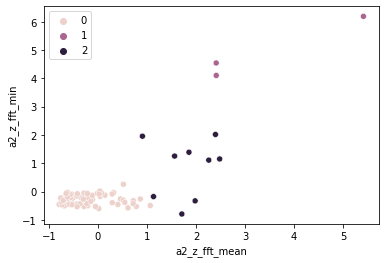

0.7195380464694051


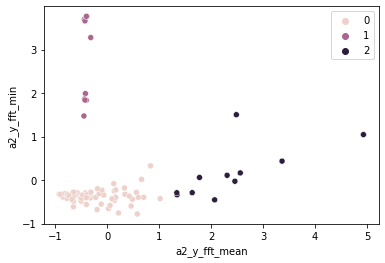

0.7172934296278666


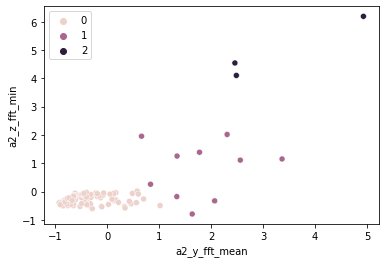

0.7124086646197275


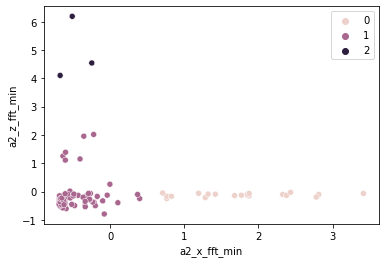

0.7099516184508856


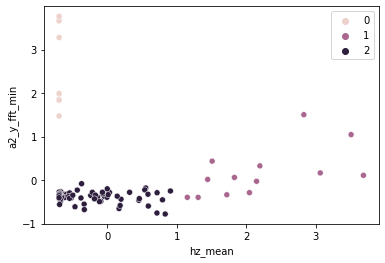

0.7073301686253005


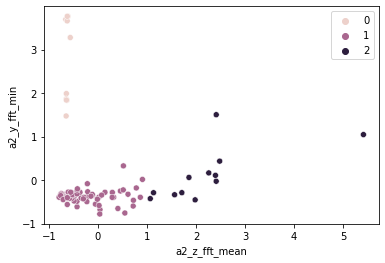

0.6869610050534216


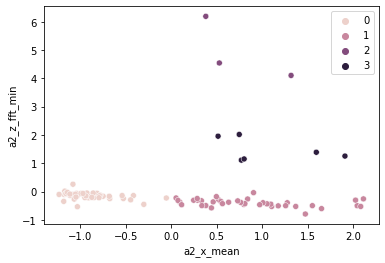

0.6724708379042081


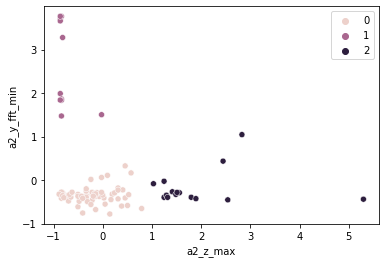

In [2]:
score_dict_keys = list(score_dict.keys())
score_dict_keys = sorted(score_dict_keys,reverse=True)
features_list = []
for key in score_dict_keys[0:50]:
    nr_clusters = score_dict[key][2]
    if nr_clusters >= 3:
        print(key)
        feature1 = score_dict[key][0]
        feature2 = score_dict[key][1]
        features_list.append(feature1)
        features_list.append(feature2)
        km = KMeans(random_state=42, n_clusters=nr_clusters)
        X = df_scaled[[feature1,feature2]]
        km.fit(X)
        sns.scatterplot(data=df_scaled, x=feature1, y=feature2, hue=km.labels_)
        plt.show()
# c = Counter(features_list)

In [2]:
# https://trello.com/b/czJSpr2F/challenge-clustering
# https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891
# https://towardsdatascience.com/clustering-with-more-than-two-features-try-this-to-explain-your-findings-b053007d680a